In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [2]:
SPX = pd.read_csv('data/SPX.csv', skiprows=2)
VIX = pd.read_csv('data/VIX.csv', skiprows=2)

SPX.drop(columns=["Ticker", "Open", "High", "Low"], inplace=True)
VIX.drop(columns=["Ticker", "Open", "High", "Low"], inplace=True)

In [3]:
print(SPX.shape)
print(VIX.shape)

(9159, 2)
(9211, 2)


In [4]:
df = SPX.merge(VIX, on="Date")
df.columns = ["Date", "SPX", "VIX"]

In [5]:
df["SPX_pct"] = df.SPX.pct_change(periods=1)

# We really don't want to predict changes in the VIX as much as the absolute level 
# of the VIX, since it is already an annualized volatility figure.
#df["VIX_pct"] = df.VIX.pct_change(periods=1)

In [6]:
df

,Date,SPX,VIX,SPX_pct
0,01/02/1986,209.59,18.07,NaN
1,01/03/1986,210.88,17.96,0.006155
2,01/06/1986,210.65,17.05,-0.001091
3,01/07/1986,213.80,17.39,0.014954
4,01/08/1986,207.97,19.97,-0.027268
...,...,...,...,...
9149,04/28/2022,4287.50,29.99,0.024747
9150,04/29/2022,4131.93,33.40,-0.036285
9151,05/02/2022,4155.38,32.34,0.005675
9152,05/03/2022,4175.48,29.25,0.004837


In [7]:
df["SPX_5d_vol"] = df.SPX_pct.rolling(5).std() * np.sqrt(255) # Scale to annualized volatility
df["SPX_30d_vol"] = df.SPX_pct.rolling(30).std() * np.sqrt(255) # Scale to annualized volatility
df["SPX_60d_vol"] = df.SPX_pct.rolling(60).std() * np.sqrt(255) # Scale to annualized volatility
df["SPX_90d_vol"] = df.SPX_pct.rolling(90).std() * np.sqrt(255) # Scale to annualized volatility

# Scale VIX to be a percentage
df.VIX = df.VIX / 100

# Target variable:
df["VIX_lag1"] = df["VIX"].shift(1)

In [8]:
df

,Date,SPX,VIX,SPX_pct,SPX_5d_vol,SPX_30d_vol,SPX_60d_vol,SPX_90d_vol,VIX_lag1
0,01/02/1986,209.59,0.1807,NaN,NaN,NaN,NaN,NaN,NaN
1,01/03/1986,210.88,0.1796,0.006155,NaN,NaN,NaN,NaN,0.1807
2,01/06/1986,210.65,0.1705,-0.001091,NaN,NaN,NaN,NaN,0.1796
3,01/07/1986,213.80,0.1739,0.014954,NaN,NaN,NaN,NaN,0.1705
4,01/08/1986,207.97,0.1997,-0.027268,NaN,NaN,NaN,NaN,0.1739
...,...,...,...,...,...,...,...,...,...
9149,04/28/2022,4287.50,0.2999,0.024747,0.366065,0.207317,0.227166,0.211156,0.3160
9150,04/29/2022,4131.93,0.3340,-0.036285,0.403561,0.228318,0.237515,0.218773,0.2999
9151,05/02/2022,4155.38,0.3234,0.005675,0.403518,0.225803,0.233115,0.216732,0.3340
9152,05/03/2022,4175.48,0.2925,0.004837,0.356066,0.226703,0.233078,0.216117,0.3234


In [9]:
df = df.iloc[100:,:]
df

,Date,SPX,VIX,SPX_pct,SPX_5d_vol,SPX_30d_vol,SPX_60d_vol,SPX_90d_vol,VIX_lag1
100,05/27/1986,244.75,0.1692,0.014087,0.139841,0.144246,0.147082,0.137361,0.1674
101,05/28/1986,246.63,0.1775,0.007681,0.138049,0.145517,0.146709,0.137414,0.1692
102,05/29/1986,247.98,0.1876,0.005474,0.101658,0.136191,0.146354,0.137131,0.1775
103,05/30/1986,247.35,0.1889,-0.002541,0.095217,0.136312,0.146566,0.136210,0.1876
104,06/02/1986,245.04,0.1828,-0.009339,0.145895,0.139086,0.148252,0.135732,0.1889
...,...,...,...,...,...,...,...,...,...
9149,04/28/2022,4287.50,0.2999,0.024747,0.366065,0.207317,0.227166,0.211156,0.3160
9150,04/29/2022,4131.93,0.3340,-0.036285,0.403561,0.228318,0.237515,0.218773,0.2999
9151,05/02/2022,4155.38,0.3234,0.005675,0.403518,0.225803,0.233115,0.216732,0.3340
9152,05/03/2022,4175.48,0.2925,0.004837,0.356066,0.226703,0.233078,0.216117,0.3234


In [10]:
ols_5d = sm.regression.linear_model.OLS(endog = df.VIX_lag1, exog = df.SPX_5d_vol).fit()
print(ols_5d.summary())

                                 OLS Regression Results                                
Dep. Variable:               VIX_lag1   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                          4.500e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):                        0.00
Time:                        10:54:06   Log-Likelihood:                          8899.9
No. Observations:                9054   AIC:                                 -1.780e+04
Df Residuals:                    9053   BIC:                                 -1.779e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [11]:
ols_30d = sm.regression.linear_model.OLS(endog = df.VIX_lag1, exog = df.SPX_30d_vol).fit()
print(ols_30d.summary())

                                 OLS Regression Results                                
Dep. Variable:               VIX_lag1   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.025e+05
Date:                Sat, 07 May 2022   Prob (F-statistic):                        0.00
Time:                        10:54:06   Log-Likelihood:                          12181.
No. Observations:                9054   AIC:                                 -2.436e+04
Df Residuals:                    9053   BIC:                                 -2.435e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [12]:
ols_60d = sm.regression.linear_model.OLS(endog = df.VIX_lag1, exog = df.SPX_60d_vol).fit()
print(ols_60d.summary())

                                 OLS Regression Results                                
Dep. Variable:               VIX_lag1   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.030e+05
Date:                Sat, 07 May 2022   Prob (F-statistic):                        0.00
Time:                        10:54:06   Log-Likelihood:                          12200.
No. Observations:                9054   AIC:                                 -2.440e+04
Df Residuals:                    9053   BIC:                                 -2.439e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

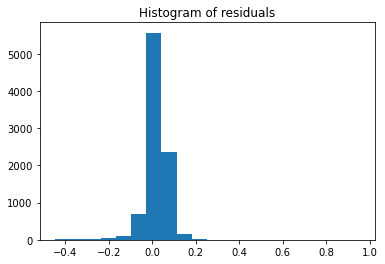

In [13]:
plt.hist(ols_60d.resid, bins=20)
plt.title("Histogram of residuals")
plt.show()

/Users/matthewjohnson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


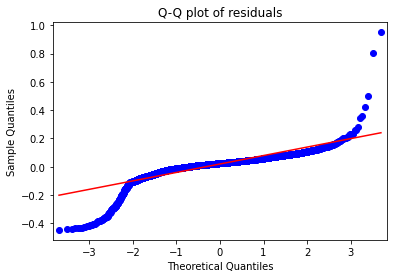

In [17]:
fig = qqplot(ols_60d.resid, line = 's')
plt.title("Q-Q plot of residuals")
plt.show()

In [15]:
ols_90d = sm.regression.linear_model.OLS(endog = df.VIX_lag1, exog = df.SPX_90d_vol).fit()
print(ols_90d.summary())

                                 OLS Regression Results                                
Dep. Variable:               VIX_lag1   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                          9.837e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):                        0.00
Time:                        10:54:06   Log-Likelihood:                          12009.
No. Observations:                9054   AIC:                                 -2.402e+04
Df Residuals:                    9053   BIC:                                 -2.401e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------